In [1]:
%load_ext autoreload
%autoreload 2

import tracemalloc
from collections import Counter
import linecache
import os

def display_top(snapshot, key_type='lineno', limit=3):
    snapshot = snapshot.filter_traces((
        tracemalloc.Filter(False, "<frozen importlib._bootstrap>"),
        tracemalloc.Filter(False, "<unknown>"),
    ))
    top_stats = snapshot.statistics(key_type)

    print("Top %s lines" % limit)
    for index, stat in enumerate(top_stats[:limit], 1):
        frame = stat.traceback[0]
        # replace "/path/to/module/file.py" with "module/file.py"
        filename = os.sep.join(frame.filename.split(os.sep)[-2:])
        print("#%s: %s:%s: %.1f KiB"
              % (index, filename, frame.lineno, stat.size / 1024))
        line = linecache.getline(frame.filename, frame.lineno).strip()
        if line:
            print('    %s' % line)

    other = top_stats[limit:]
    if other:
        size = sum(stat.size for stat in other)
        print("%s other: %.1f KiB" % (len(other), size / 1024))
    total = sum(stat.size for stat in top_stats)
    print("Total allocated size: %.1f KiB" % (total / 1024))

tracemalloc.start()


In [2]:
from utils_v1 import *


In [3]:
from icecream import ic

import numpy as np
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates, PatchesHandlerEvidential

from src.trainer.evidential import TrainerEvidential, TrainerEvidentialUEO
import src.trainer.evidential as evidential

from mpl_toolkits.axes_grid1 import make_axes_locatable

import cv2
from src import metrics as _metric


In [4]:
from enum import Enum
UncertaintyMethod = Enum('Predictor', 'pred_var MI pred_entropy KL pred_entropy_single evidential')
uncertaintyMethod = "evidential"


In [5]:

config = {
	"training": False,
	"learning_rate": 1e-4, # 1e-3
	"weights": [0.1, 0.9, 0],
	"save_probabilities": False,
	"loadInference": False,
	"addPastDeforestationInput": True,
	"inference_times": 1,
	"Uncertainty": {
		"annealing_step": 10*375 # 1875, 10*375*10
	},
	"uncertainty_method": uncertaintyMethod,
	"evidence_function": evidential.relu_evidence,
#	"loss": evidential.loss_evidential_dice
}

# config["loss"] = config["loss"](config["weights"])
'''
if config["training"] == True:
	dates = [2017, 2018]
else:
	dates = [2018, 2019]
if config["training"] == True:
	dates = [2018, 2019]
else:
	dates = [2019, 2020]
'''
dates = [2018, 2019]
# dates = [2017, 2018]

dataset = PAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
	addPastDeforestationInput = config['addPastDeforestationInput'],
	borderBuffer = 2)	
# dates = [2019, 2020]
# dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
# 	addPastDeforestationInput = config['addPastDeforestationInput'],
# 	borderBuffer = 2)	
# dataset = MTDeforestationTime()	
# [2016, 2017, 2018]

ic(dates)


if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerEvidential(
		dataset)
else:
	patchesHandler = PatchesHandler()

# exp = 170
# exp = 155
exp = 155 # relu
# exp = 171 # softsign
## exp = 173
exp = 191
exp = 192
exp = 193

# if config["training"] == True:
# trainer = TrainerEvidentialUEO(config, dataset, patchesHandler)
trainer = TrainerEvidential(config, dataset, patchesHandler)

trainer.defineExperiment(exp)


ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| dates: [2018, 2019]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [6]:
exp

193

In [7]:
trainer.setExperimentPath()
trainer.createLogFolders()

In [8]:
# ic(type(dataset), exp, dataset.dates)


In [9]:

trainer.loadLabel()

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


In [10]:

# Creating tile mask
trainer.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [11]:

trainer.label_mask.dtype

dtype('uint8')

In [12]:

trainer.getLabelCurrentDeforestation()

In [13]:

trainer.loadInputImage()

ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [14]:

np.unique(trainer.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

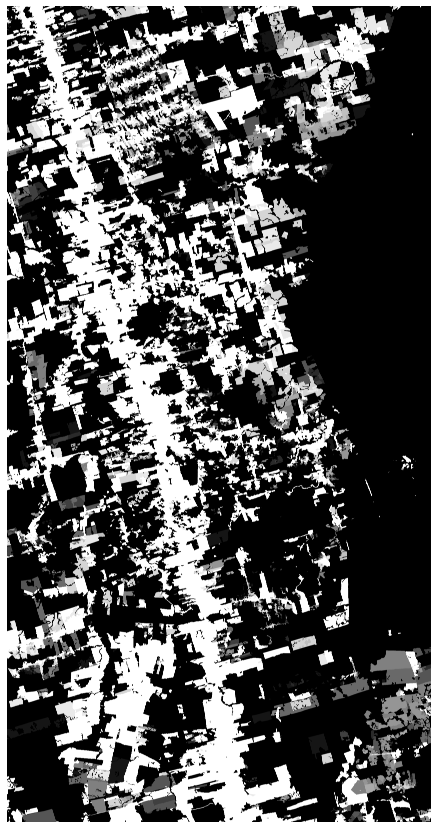

In [15]:

trainer.logger.plotFigure(trainer.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False)

In [16]:

trainer.getImageChannels()

ic| self.image_stack.shape: (17730, 9200, 21)
ic| self.channels: 21


In [17]:

trainer.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


In [18]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    trainer.createIdxImage()


In [19]:
if config["training"] == True:
    trainer.extractCoords()

In [20]:
if config["training"] == True:
    trainer.trainTestSplit()

In [21]:
if config["training"] == True:
    trainer.label_mask.shape

In [22]:
if config["training"] == True:
    if type(dataset) != PADeforestationTime and type(dataset) != MTDeforestationTime:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)

    else:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)



In [23]:
if config["training"] == True:
    np.unique(trainer.label_mask)

In [24]:
if config["training"] == True:
    print(trainer.coords_train)

In [25]:
if config["training"] == True:
    trainer.retrieveSamplesOfInterest()

In [26]:
if config["training"] == True:
    inputSnipShow = True

In [27]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 2800)


In [28]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 97)


In [29]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 1200)

In [30]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 400)

In [31]:
if config["training"] == True:
    trainer.getGenerators()


In [32]:
if config["training"] == True:
    trainer.fixChannelNumber()

In [33]:
if config["training"] == True:
    print(trainer.path_exp)

In [34]:
if config["training"] == True:
    print(trainer.channels)

In [35]:
if config["training"] == True:
    print(trainer.image_stack.shape)

In [36]:
# trainer.weights = [0.01, 0.99, 0]
trainer.weights

[0.1, 0.9, 0]

### Evidential metrics

In [37]:
if config["training"] == True:
    trainer.train()

In [38]:
if config["training"] == True:
    trainer.plotHistory()


In [39]:
if config["training"] == True:
    trainer.plotLossTerms()

In [40]:
if config["training"] == True:
    trainer.plotAnnealingCoef()

In [41]:
def draw_EDL_results(K, history):
    # train_acc1, train_ev_s, train_ev_f, test_acc1, test_ev_s, test_ev_f 
    # calculate uncertainty for training and testing data for correctly and misclassified samples
    '''
    K: known classes
    '''
    train_u_succ = K / (K+np.array(history['evidential_success']))
    train_u_fail = K / (K+np.array(history['evidential_fail']))
    test_u_succ  = K / (K+np.array(history['val_evidential_success']))
    test_u_fail  = K / (K+np.array(history['val_evidential_fail']))
    
    f, axs = plt.subplots(2, 2)
    f.set_size_inches([10,10])
    
    axs[0,0].plot(history['evidential_success'],c='r',marker='+')
    axs[0,0].plot(history['evidential_fail'],c='k',marker='x')
    axs[0,0].set_title('Train Data')
    axs[0,0].set_xlabel('Epoch')
    axs[0,0].set_ylabel('Estimated total evidence for classification') 
    axs[0,0].legend(['Correct Clasifications','Misclasifications'])
    
    axs[0,1].plot(train_u_succ,c='r',marker='+')
    axs[0,1].plot(train_u_fail,c='k',marker='x')
    axs[0,1].plot(history['acc'],c='blue',marker='*')
    axs[0,1].set_title('Train Data')
    axs[0,1].set_xlabel('Epoch')
    axs[0,1].set_ylabel('Estimated uncertainty for classification')
    axs[0,1].legend(['Correct clasifications','Misclasifications', 'Accuracy'])
    
    axs[1,0].plot(history['val_evidential_success'],c='r',marker='+')
    axs[1,0].plot(history['val_evidential_fail'],c='k',marker='x')
    axs[1,0].set_title('Test Data')
    axs[1,0].set_xlabel('Epoch')
    axs[1,0].set_ylabel('Estimated total evidence for classification') 
    axs[1,0].legend(['Correct Clasifications','Misclasifications'])
    
    axs[1,1].plot(test_u_succ,c='r',marker='+')
    axs[1,1].plot(test_u_fail,c='k',marker='x')
    axs[1,1].plot(history['val_acc'],c='blue',marker='*')
    axs[1,1].set_title('Test Data')
    axs[1,1].set_xlabel('Epoch')
    axs[1,1].set_ylabel('Estimated uncertainty for classification')
    axs[1,1].legend(['Correct clasifications','Misclasifications', 'Accuracy'])
    

In [42]:
if config["training"] == True:
    draw_EDL_results(trainer.class_n, trainer.history.history)

    plt.figure(5)
    plt.plot(trainer.history.history['evidential_success'],c='r',marker='+')
    plt.plot(trainer.history.history['evidential_fail'],c='k',marker='x')
    plt.title('Train Data')
    plt.xlabel('Epoch')
    plt.ylabel('Estimated total evidence for classification') 
    plt.legend(['Correct Clasifications','Misclasifications'])


In [43]:
trainer.image_stack.shape

(17730, 9200, 21)

In [44]:
if type(trainer.dataset) != PADeforestationTime and type(trainer.dataset) != MTDeforestationTime:
    trainer.patchesHandler.dataset.image_channels[-1]

In [45]:
if issubclass(type(dataset), MultipleDates):
	trainer.channels = trainer.patchesHandler.input_image_shape
	trainer.image_stack = trainer.image_stack[..., trainer.patchesHandler.dataset.image_channels[-1]]
	trainer.label_mask = trainer.label_mask[...,-1]

In [46]:
trainer.image_stack.shape

(17730, 9200, 21)

In [47]:
trainer.setPadding()

-30.0 -16.0


In [48]:
trainer.infer()

ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp193/models/resunet_0.h5'


time:  0


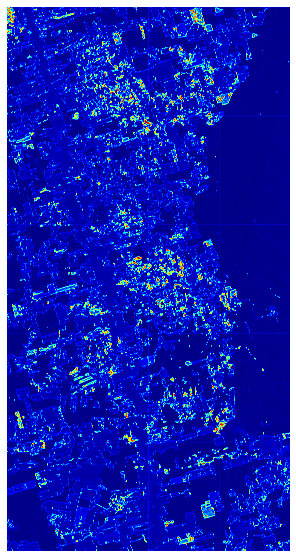

In [49]:
trainer.logger.plotFigure(trainer.u_reconstructed, 
            name='Uncertainty', cmap='jet', savefig=False, figsize=(10,10))

In [50]:
trainer.loadPredictedProbabilities()


In [51]:
trainer.prob_rec.shape

(17760, 9216)

In [52]:
trainer.getMeanProb()

In [53]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 0.0094805285
    np.mean(value): 0.04315007
    np.max(value): 0.93539715


In [54]:
ic(trainer.mean_prob.shape)

ic| trainer.mean_prob.shape: (17760, 9216)


(17760, 9216)

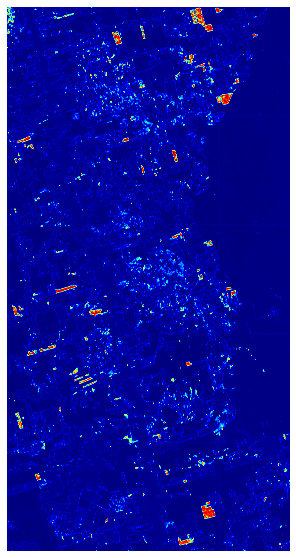

In [55]:
trainer.unpadMeanProb()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

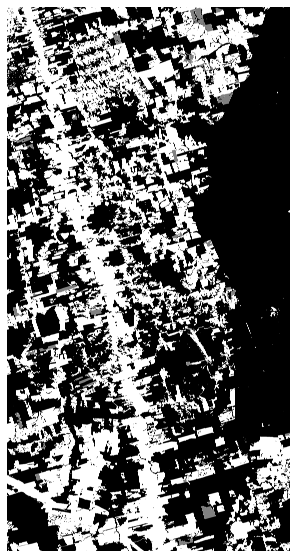

In [56]:
trainer.logger.plotFigure(trainer.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [57]:
trainer.squeezeLabel()

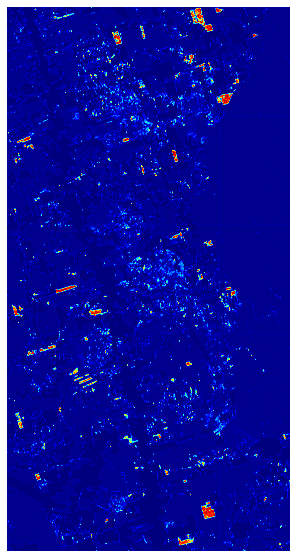

In [58]:
trainer.setMeanProbNotConsideredAreas()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [59]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 0.0
    np.mean(value): 0.030521672
    np.max(value): 0.93539715


In [60]:
print(trainer.label_mask.shape)

(17730, 9200)


In [61]:
trainer.getLabelTest()

(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))


In [62]:
trainer.getMAP()

83.56


In [63]:
trainer.prob_rec.shape

(17760, 9216)

In [64]:
trainer.preprocessProbRec()
print(trainer.prob_rec.shape)

(17760, 9216, 1)


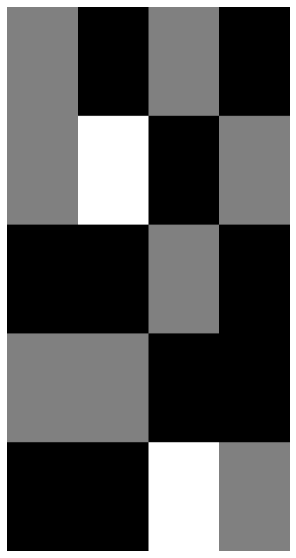

In [65]:
trainer.logger.plotFigure(trainer.mask_tr_val, 
            name=trainer.dataset.site + trainer.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [66]:
trainer.getLabelCurrentDeforestation()

In [67]:
trainer.applyProbabilityThreshold()

(17730, 9200)
(array([0., 1.], dtype=float32), array([161029730,   2086270], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)


In [68]:
trainer.getTestValues()

ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)


In [69]:
trainer.removeSmallPolygons()

ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161029730,   2086270], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161371219,   1744781], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162774511,    341489], dtype=int64))


In [70]:
trainer.calculateMetrics()

ic| self.f1: 82.34, self.precision: 82.94, self.recall: 81.75


In [71]:
trainer.getValidationValuesForMetrics()
trainer.calculateMetricsValidation()

ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9413688,)
ic| f1_val: 85.66
    precision_val: 83.25
    recall_val: 88.22
    mAP_val: 87.34


In [72]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    trainer.calculateMAPWithoutSmallPolygons()

In [73]:
trainer.getErrorMask()

(array([0., 1.], dtype=float32), array([162434561,    681439], dtype=int64))


In [74]:
'''

import types

trainer.getErrorMaskToShowRGB = types.MethodType(getErrorMaskToShowRGB, trainer)
'''


'\n\nimport types\n\ntrainer.getErrorMaskToShowRGB = types.MethodType(getErrorMaskToShowRGB, trainer)\n'

In [75]:
trainer.getErrorMaskToShowRGB()

[0. 1.]


In [76]:
predicted_unpad_to_show = trainer.predicted_unpad.copy()

predicted_unpad_to_show[trainer.label_mask == 2] = 0
print(np.unique(predicted_unpad_to_show))

[0. 1.]


In [77]:
predicted_unpad_to_show.shape

(17730, 9200)

In [78]:

'''
trainer.logger.plotFigure = types.MethodType(trainer.logger.plotFigure, trainer)
'''

'\ntrainer.logger.plotFigure = types.MethodType(trainer.logger.plotFigure, trainer)\n'

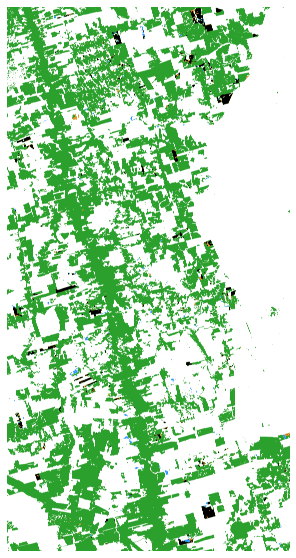

In [79]:
trainer.logger.plotFigure(trainer.error_mask_to_show_rgb[...,::-1], 
            name=trainer.dataset.site + trainer.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [80]:
trainer.setUncertainty()

In [81]:
trainer.getValidationValues2()
trainer.getTestValues2()

ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54061692,)


In [82]:
trainer.getUncertaintyToShow()
trainer.logger.getStats(trainer.uncertainty_to_show)


ic| np.min(value): 0.0, np.mean(value): 0.06510457, np.max(value): 1.0


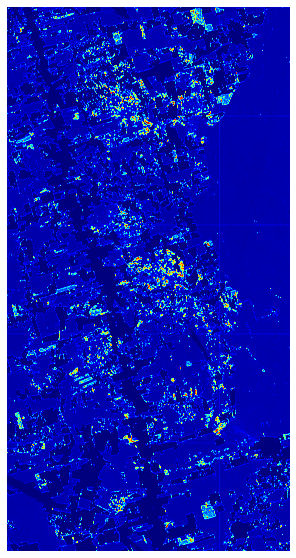

In [83]:
trainer.logger.plotFigure(trainer.uncertainty_to_show, 
            name=trainer.dataset.site + trainer.title_name + ' uncertainty evidential learning.png', figsize=(10,10), cmap='jet', savefig=True)

ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


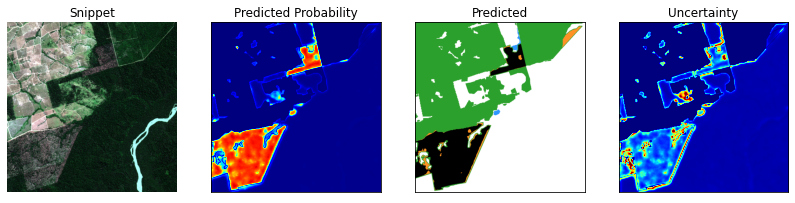

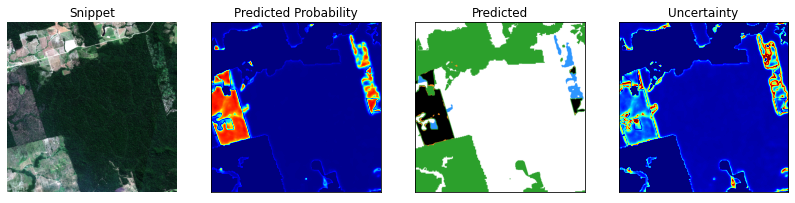

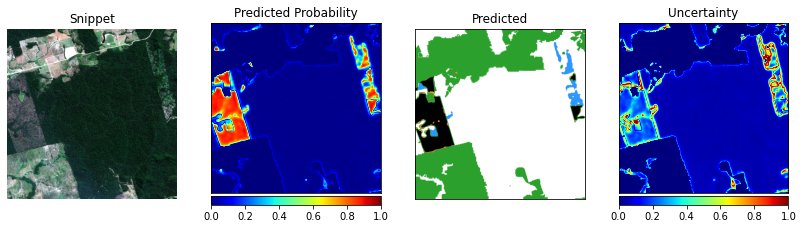

In [84]:
trainer.logger.plotCropSample(trainer)

In [85]:
trainer.logger.getStats(trainer.uncertainty)

ic| np.min(value): 0.028441584
    np.mean(value): 0.09498054
    np.max(value): 1.0


In [86]:
get_other_uncertainty_metrics = True
if get_other_uncertainty_metrics == True:
    trainer.getOtherUncertaintyMetrics()
    print(trainer.sUEO)

    print(trainer.ece_score)  

(54061692,) (54061692,)
0.35433244783923784
0
0.35433244783923784
0


In [87]:
# trainer.getUncertaintyMetrics()

In [88]:
trainer.m

AttributeError: 'TrainerEvidential' object has no attribute 'm'

In [ ]:
print(trainer.uncertainty.shape, trainer.predicted_test.shape)
print(trainer.uncertainty.dtype, trainer.predicted_test.dtype)
print(np.unique(trainer.predicted_test))
print(trainer.label_mask_current_deforestation_test.shape)


(54061692,) (54061692,)
float32 float32
[0. 1.]
(54061692,)


In [ ]:
trainer.mean_prob[trainer.mask_amazon_ts == 1].shape

(81558000,)

In [ ]:
uncertainty_test_correct = trainer.uncertainty[trainer.predicted_test == trainer.label_mask_current_deforestation_test]
uncertainty_test_incorrect = trainer.uncertainty[trainer.predicted_test != trainer.label_mask_current_deforestation_test]

predicted_test_correct = trainer.uncertainty[trainer.predicted_test == trainer.label_mask_current_deforestation_test]
uncertainty_test_incorrect = trainer.uncertainty[trainer.predicted_test != trainer.label_mask_current_deforestation_test]


In [ ]:
print(np.min(uncertainty_test_correct), np.mean(uncertainty_test_correct), np.max(uncertainty_test_correct))
print(np.min(uncertainty_test_incorrect), np.mean(uncertainty_test_incorrect), np.max(uncertainty_test_incorrect))


0.028441584 0.09245397 1.0
0.042045273 0.62450427 1.0


In [ ]:
trainer.alpha_reconstructed.shape

(17760, 9216, 3)

In [ ]:
trainer.alpha_unpad = trainer.alpha_reconstructed[:trainer.label_mask.shape[0], :trainer.label_mask.shape[1]]

In [ ]:
trainer.alpha_unpad.shape

(17730, 9200, 3)

In [ ]:
print(np.min(trainer.alpha_unpad), np.mean(trainer.alpha_unpad), np.max(trainer.alpha_unpad))

1.0 16.96288 103.479355


In [ ]:
trainer.predicted_unpad.shape

(17730, 9200)

In [ ]:
trainer.label_mask.shape

(17730, 9200)

In [ ]:
'''
fig = plt.figure(figsize=(20,20))


plt.imshow(trainer.alpha_unpad.astype(np.uint8))
plt.plot(6600, 16500, marker='v', color="white")
plt.plot(5600, 16500, marker='v', color="white")
plt.plot(4600, 16500, marker='v', color="white")
'''

'\nfig = plt.figure(figsize=(20,20))\n\n\nplt.imshow(trainer.alpha_unpad.astype(np.uint8))\nplt.plot(6600, 16500, marker=\'v\', color="white")\nplt.plot(5600, 16500, marker=\'v\', color="white")\nplt.plot(4600, 16500, marker=\'v\', color="white")\n'

Reference 0
Predicted 1.0
Evidence [0.       5.442935 0.      ]
Alpha [1.       6.442935 1.      ]
trimesh.x [0.         1.         0.5        ... 0.50390625 0.50195312 0.49804688]
trimesh.y [0.         0.         0.8660254  ... 0.28416459 0.29431332 0.2875475 ]
xy2bc(xy) [1. 0. 0.]
pvals [8.111254259691301e-21, 47.92825083309755, 8.111254259691301e-21, 1.1024052645298306, 1.1024052645298306, 8.111254259691301e-21, 0.025342799176313418, 10.018312025133337, 8.111254259691301e-21, 1.102405264529832, 0.025342799176313418, 8.111254259691301e-21, 10.018312025133337, 0.0253427991763134, 0.025342799176313442, 0.0005825965194069269, 8.111254259691301e-21, 0.025342799176313418, 23.183637504184126, 3.7137800525785463, 3.7137800525785494, 8.111254259691301e-21, 0.23030738142100887, 0.0005825965194069276, 1.102405264529832, 0.23030738142100848, 0.0005825965194069262, 0.23030738142100848, 0.0005825965194069276, 3.7137800525785463, 0.025342799176313418, 0.025342799176313418, 8.111254259691301e-21, 0

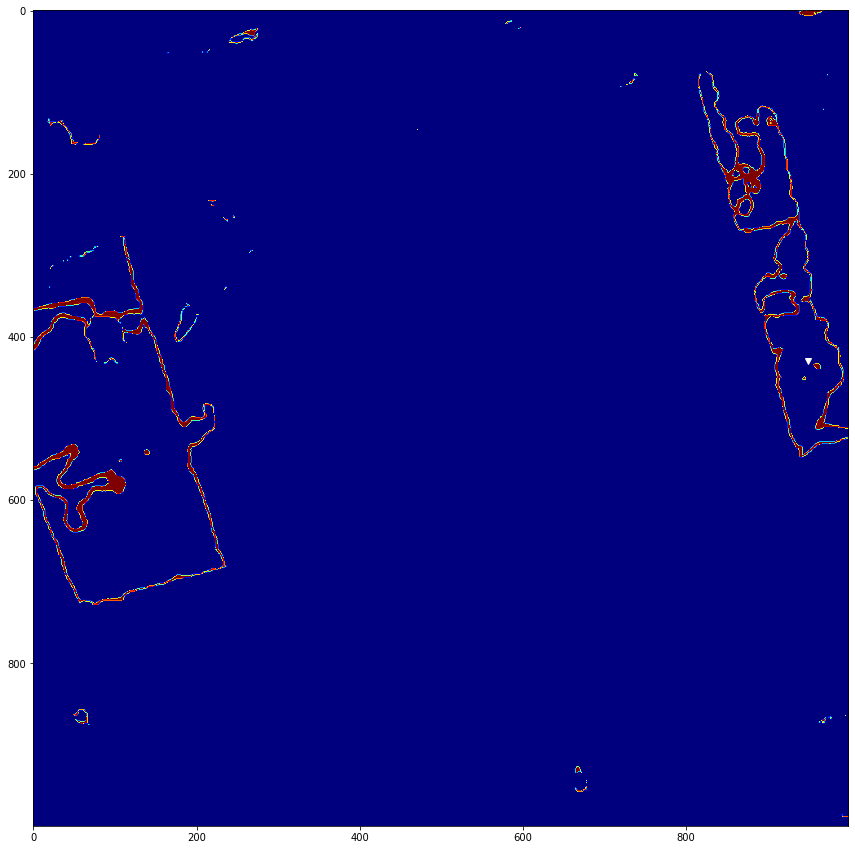

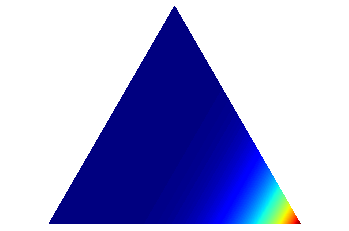

In [ ]:
# lims = dataset.previewLims1
lims = dataset.previewLims2

# im = trainer.alpha_unpad[lims[0]:lims[1], lims[2]:lims[3]]
im = trainer.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
plt.figure(figsize=(15,15))
plt.imshow(im.astype(np.uint8), cmap='jet')

# row, col = (550, 550) # high evidence in class 0
# row, col = (200, 600) # class 1 is higher but it has high uncertainty
# row, col = (207, 617) # class 1 is higher but it has high uncertainty
row, col = (800, 200) # high evidence in class 1
# row, col = (200, 605) # alpha 1, 1, 1

row, col = (430, 950) # alpha 1, 1, 1

plt.plot(col, row, marker='v', color="white")

plt.figure()
print("Reference",trainer.label_mask[lims[0]:lims[1], lims[2]:lims[3]][row, col])
print("Predicted",trainer.predicted_unpad[lims[0]:lims[1], lims[2]:lims[3]][row, col])
print("Evidence", trainer.alpha_unpad[lims[0]:lims[1], lims[2]:lims[3]][row, col] - 1)
print("Alpha", trainer.alpha_unpad[lims[0]:lims[1], lims[2]:lims[3]][row, col])

trainer.getMassFcn(trainer.alpha_unpad[lims[0]:lims[1], lims[2]:lims[3]][row, col])


[3.2860356845369023, 3.2484088665432926, 3.211025648219068, 3.173885677015465, 3.1369885991036845, 3.1003340593636786, 3.0639217013727804, 3.0277511673941726, 2.9918220983651977, 2.9561341338854956, 2.9206869122049826, 2.8854800702116474, 2.8505132434191807, 2.8157860659544203, 2.7812981705446123, 2.7470491885044943, 2.7130387497231796, 2.6792664826508537, 2.645732014285269, 2.612434970158039, 2.579374974320731, 2.546551649330738, 2.5139646162369513, 2.4816134945651984, 2.449497902303466, 2.417617455886896, 2.3859717701825436, 2.3545604584738973, 2.32338313244516, 2.292439402165275, 2.2617288760717074, 2.2312511609539554, 2.201005861936802, 2.1709925824632967, 2.1412109242774555, 2.1116604874066813, 2.082340870143894, 2.053251669029362, 2.0243924788322323, 1.9957628925317483, 1.9673625012981575, 1.9391908944732825, 1.9112476595507701, 1.8835323821559975, 1.8560446460256232, 1.8287840329867977, 1.801750122935989, 1.77494249381745, 1.7483607216012966, 1.7220043802611906, 1.69587304175163

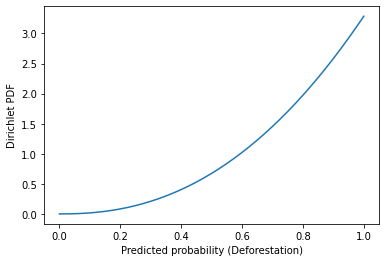

In [ ]:
trainer.getMassFcn2D(trainer.alpha_unpad[lims[0]:lims[1], lims[2]:lims[3]][row, col][:2])


In [ ]:


trainer.getPOIValues()


[{'coords': [550, 550],
  'reference': 0,
  'predicted': 0.0,
  'alpha': array([71.675156,  1.      ,  1.      ], dtype=float32)},
 {'coords': [210, 610],
  'reference': 1,
  'predicted': 0.0,
  'alpha': array([1.       , 1.1345048, 1.       ], dtype=float32)},
 {'coords': [207, 617],
  'reference': 1,
  'predicted': 0.0,
  'alpha': array([1., 1., 1.], dtype=float32)},
 {'coords': [800, 200],
  'reference': 1,
  'predicted': 1.0,
  'alpha': array([1.       , 8.7371435, 1.       ], dtype=float32)}]

In [ ]:
'''
lims = dataset.previewLims1

coords = {
    "snippet_id0": [
        [550, 550], # 10,1 alpha
        [210, 610], #harder 1,1 alpha
        [207, 617], # easy 1,1 alpha
        [800, 200] # easy 1,10 alpha
    ],
    "snippet_id1": [
        [550, 115], # 10,1 alpha # I think will diverge from ensemble
        [430, 950] # Will diverge from ensemble
    ]
}

poi_alpha_info = []
for coord in coords["snippet_id0"]:
    poi_alpha_info.append(
        {"snippet_id": 0,
            "coords": coord, # 10,1 alpha
               "reference": trainer.label_mask[lims[0]:lims[1], lims[2]:lims[3]][coord[0], coord[1]],
               "predicted": trainer.predicted_unpad[lims[0]:lims[1], lims[2]:lims[3]][coord[0], coord[1]],
               "alpha": trainer.alpha_unpad[lims[0]:lims[1], lims[2]:lims[3]][coord[0], coord[1]]}
    )

poi_alpha_info
lims = dataset.previewLims2

poi_alpha_info2 = []
for coord in coords["snippet_id1"]:
    poi_alpha_info2.append(
        {"snippet_id": 1,
            "coords": coord, # 10,1 alpha
               "reference": trainer.label_mask[lims[0]:lims[1], lims[2]:lims[3]][coord[0], coord[1]],
               "predicted": trainer.predicted_unpad[lims[0]:lims[1], lims[2]:lims[3]][coord[0], coord[1]],
               "alpha": trainer.alpha_unpad[lims[0]:lims[1], lims[2]:lims[3]][coord[0], coord[1]]}
    )

poi_alpha_info.extend(poi_alpha_info2)
'''

In [ ]:
poi_alpha_info

[{'coords': [550, 550],
  'reference': 0,
  'predicted': 0.0,
  'alpha': array([71.675156,  1.      ,  1.      ], dtype=float32)},
 {'coords': [210, 610],
  'reference': 1,
  'predicted': 0.0,
  'alpha': array([1.       , 1.1345048, 1.       ], dtype=float32)},
 {'coords': [207, 617],
  'reference': 1,
  'predicted': 0.0,
  'alpha': array([1., 1., 1.], dtype=float32)},
 {'coords': [800, 200],
  'reference': 1,
  'predicted': 1.0,
  'alpha': array([1.       , 8.7371435, 1.       ], dtype=float32)},
 {'coords': [550, 115],
  'reference': 1,
  'predicted': 1.0,
  'alpha': array([1.       , 3.2860367, 1.       ], dtype=float32)},
 {'coords': [430, 950],
  'reference': 0,
  'predicted': 1.0,
  'alpha': array([1.      , 6.442935, 1.      ], dtype=float32)}]

In [ ]:
# trainer.getMassFcn(trainer.alpha_reconstructed[2500,7300])
# trainer.getMassFcn(trainer.alpha_unpad[16500,6600])


In [ ]:
trainer.m

{'precision_L': 0.8294120091994791,
 'recall_L': 0.8684991643648012,
 'recall_Ltotal': 0.8175270698223204,
 'AA': 0.005047936716446093,
 'precision_H': nan,
 'recall_H': 0.0,
 'f1_L': 0.8485056793539116,
 'f1_H': nan}

In [ ]:
trainer.getUncertaintyAAValues()

ic| self.uncertainty.shape: (54061692,)
    self.label_mask_current_deforestation_test.shape: (54061692,)


[0.13, 0.15, 0.2, 0.225, 0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]
threshold 0.13
(47114951,) (47114951,)


ic| label_current_deforestation_test_classified_incorrect.shape: (6946741,)
    predicted_test_classified_incorrect.shape: (6946741,)


cm_correct [[47102061       42]
 [    7184     5664]]


ic| TP_H + FN_H + FP_H + TN_H: 6946741
    len(label_mask_current_deforestation_test): 54061692
ic| TP_H + FN_H + FP_H + TN_H: 6946741
    len(label_mask_current_deforestation_test): 54061692


cm_incorrect [[6104231  123085]
 [ 126436  592989]]
[0.99263933 0.44084682 0.00773482 0.12849655 0.82811134 0.82425409
 0.03588182]
threshold 0.15
(47712770,) (47712770,)


ic| label_current_deforestation_test_classified_incorrect.shape: (6348922,)
    predicted_test_classified_incorrect.shape: (6348922,)


cm_correct [[47680697      182]
 [    8003    23888]]


ic| TP_H + FN_H + FP_H + TN_H: 6348922
    len(label_mask_current_deforestation_test): 54061692
ic| TP_H + FN_H + FP_H + TN_H: 6348922
    len(label_mask_current_deforestation_test): 54061692


cm_incorrect [[5525595  122945]
 [ 125617  574765]]
[0.99243872 0.74905146 0.03262171 0.11743846 0.82378782 0.82064502
 0.03909986]
threshold 0.2
(48840431,) (48840431,)


ic| label_current_deforestation_test_classified_incorrect.shape: (5221261,)
    predicted_test_classified_incorrect.shape: (5221261,)


cm_correct [[48666728     3088]
 [    9897   160718]]


ic| TP_H + FN_H + FP_H + TN_H: 5221261
    len(label_mask_current_deforestation_test): 54061692
ic| TP_H + FN_H + FP_H + TN_H: 5221261
    len(label_mask_current_deforestation_test): 54061692


cm_incorrect [[4539564  120039]
 [ 123723  437935]]
[0.98114843 0.9419922  0.21947825 0.09657968 0.78486632 0.77971826
 0.0465706 ]
threshold 0.225
(49259504,) (49259504,)


ic| label_current_deforestation_test_classified_incorrect.shape: (4802188,)
    predicted_test_classified_incorrect.shape: (4802188,)


cm_correct [[49013445     6264]
 [   10952   228843]]


ic| TP_H + FN_H + FP_H + TN_H: 4802188
    len(label_mask_current_deforestation_test): 54061692
ic| TP_H + FN_H + FP_H + TN_H: 4802188
    len(label_mask_current_deforestation_test): 54061692


cm_incorrect [[4192847  116863]
 [ 122668  369810]]
[0.97335681 0.95432765 0.3125105  0.08882793 0.75987367 0.75091679
 0.04970137]
threshold 0.25
(49607520,) (49607520,)


ic| label_current_deforestation_test_classified_incorrect.shape: (4454172,)
    predicted_test_classified_incorrect.shape: (4454172,)


cm_correct [[49302767    10271]
 [   11811   282671]]


ic| TP_H + FN_H + FP_H + TN_H: 4454172
    len(label_mask_current_deforestation_test): 54061692
ic| TP_H + FN_H + FP_H + TN_H: 4454172
    len(label_mask_current_deforestation_test): 54061692


cm_incorrect [[3903525  112856]
 [ 121809  315982]]
[0.96493845 0.95989229 0.3860186  0.08239054 0.73683302 0.72176449
 0.05242442]
threshold 0.27
(49853477,) (49853477,)


ic| label_current_deforestation_test_classified_incorrect.shape: (4208215,)
    predicted_test_classified_incorrect.shape: (4208215,)


cm_correct [[49506604    14111]
 [   12462   320300]]


ic| TP_H + FN_H + FP_H + TN_H: 4208215
    len(label_mask_current_deforestation_test): 54061692
ic| TP_H + FN_H + FP_H + TN_H: 4208215
    len(label_mask_current_deforestation_test): 54061692


cm_incorrect [[3699688  109016]
 [ 121158  278353]]
[0.95780342 0.96254981 0.43740518 0.07784098 0.71857325 0.69673426
 0.05435313]
threshold 0.3
(50181429,) (50181429,)


ic| label_current_deforestation_test_classified_incorrect.shape: (3880263,)
    predicted_test_classified_incorrect.shape: (3880263,)


cm_correct [[49778763    20962]
 [   13390   368314]]


ic| TP_H + FN_H + FP_H + TN_H: 3880263
    len(label_mask_current_deforestation_test): 54061692
ic| TP_H + FN_H + FP_H + TN_H: 3880263
    len(label_mask_current_deforestation_test): 54061692


cm_incorrect [[3427529  102165]
 [ 120230  230339]]
[0.94615132 0.96492046 0.50297362 0.07177472 0.69274054 0.65704326
 0.05681146]
threshold 0.34
(50560047,) (50560047,)


ic| label_current_deforestation_test_classified_incorrect.shape: (3501645,)
    predicted_test_classified_incorrect.shape: (3501645,)


cm_correct [[50097211    30610]
 [   14610   417616]]


ic| TP_H + FN_H + FP_H + TN_H: 3501645
    len(label_mask_current_deforestation_test): 54061692
ic| TP_H + FN_H + FP_H + TN_H: 3501645
    len(label_mask_current_deforestation_test): 54061692


cm_incorrect [[3109081   92517]
 [ 119010  181037]]
[0.93170856 0.96619824 0.57030097 0.06477128 0.66179621 0.60336214
 0.05963774]
threshold 0.36
(50730892,) (50730892,)


ic| label_current_deforestation_test_classified_incorrect.shape: (3330800,)
    predicted_test_classified_incorrect.shape: (3330800,)


cm_correct [[50241789    35592]
 [   15279   438232]]


ic| TP_H + FN_H + FP_H + TN_H: 3330800
    len(label_mask_current_deforestation_test): 54061692
ic| TP_H + FN_H + FP_H + TN_H: 3330800
    len(label_mask_current_deforestation_test): 54061692


cm_incorrect [[2964503   87535]
 [ 118341  160421]]
[0.9248835  0.96630953 0.5984544  0.06161109 0.64697366 0.57547657
 0.06087996]
threshold 0.45
(51402990,) (51402990,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2658702,)
    predicted_test_classified_incorrect.shape: (2658702,)


cm_correct [[50818921    59834]
 [   18751   505484]]


ic| TP_H + FN_H + FP_H + TN_H: 2658702
    len(label_mask_current_deforestation_test): 54061692
ic| TP_H + FN_H + FP_H + TN_H: 2658702
    len(label_mask_current_deforestation_test): 54061692


cm_incorrect [[2387371   63293]
 [ 114869   93169]]
[0.89415869 0.96423169 0.69029447 0.04917904 0.59547366 0.44784607
 0.06508707]
threshold 0.55
(52058464,) (52058464,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2003228,)
    predicted_test_classified_incorrect.shape: (2003228,)


cm_correct [[51394869    87365]
 [   23872   552358]]


ic| TP_H + FN_H + FP_H + TN_H: 2003228
    len(label_mask_current_deforestation_test): 54061692
ic| TP_H + FN_H + FP_H + TN_H: 2003228
    len(label_mask_current_deforestation_test): 54061692


cm_incorrect [[1811423   35762]
 [ 109748   46295]]
[0.86343308 0.9585721  0.75430611 0.03705448 0.564181   0.29668104
 0.06881646]
threshold 0.65
(52632334,) (52632334,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1429358,)
    predicted_test_classified_incorrect.shape: (1429358,)
ic| TP_H + FN_H + FP_H + TN_H: 1429358
    len(label_mask_current_deforestation_test): 54061692
ic| TP_H + FN_H + FP_H + TN_H

cm_correct [[51911951   108140]
 [   30760   581483]]
cm_incorrect [[1294341   14987]
 [ 102860   17170]]


: 1429358
    len(label_mask_current_deforestation_test): 54061692


[0.84318968 0.94975851 0.79407953 0.02643939 0.53394284 0.14304757
 0.07514516]
threshold 0.8
(53285889,) (53285889,)


ic| label_current_deforestation_test_classified_incorrect.shape: (775803,)
    predicted_test_classified_incorrect.shape: (775803,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 775803
    len(label_mask_current_deforestation_test): 54061692
ic| TP_H + FN_H + FP_H + TN_H: 775803
    len(label_mask_current_deforestation_test): 54061692


cm_correct [[52512211   123127]
 [   51898   598653]]
cm_incorrect [[694081      0]
 [ 81722      0]]
[0.82941201 0.92022455 0.81752707 0.01435033        nan 0.
 0.08594825]


In [ ]:
trainer.getUncertaintyAAAuditedValues()

ic| self.uncertainty.shape: (54061692,)
    self.label_mask_current_deforestation_test.shape: (54061692,)


threshold 0.13
(54061692,) (54061692,)
cm_audited [[53329377       42]
 [    7184   725089]]
[0.99994208 0.99018945]
threshold 0.15
(54061692,) (54061692,)
cm_audited [[53329237      182]
 [    8003   724270]]
[0.99974878 0.98907102]
threshold 0.2
(54061692,) (54061692,)
cm_audited [[53326331     3088]
 [    9897   722376]]
[0.99574341 0.98648455]
threshold 0.225
(54061692,) (54061692,)
cm_audited [[53323155     6264]
 [   10952   721321]]
[0.9913907  0.98504383]
threshold 0.25
(54061692,) (54061692,)
cm_audited [[53319148    10271]
 [   11811   720462]]
[0.98594425 0.98387077]
threshold 0.27
(54061692,) (54061692,)
cm_audited [[53315308    14111]
 [   12462   719811]]
[0.98077316 0.98298176]
threshold 0.3
(54061692,) (54061692,)
cm_audited [[53308457    20962]
 [   13390   718883]]
[0.97166704 0.98171447]
threshold 0.34
(54061692,) (54061692,)
cm_audited [[53298809    30610]
 [   14610   717663]]
[0.95909247 0.98004842]
threshold 0.36
(54061692,) (54061692,)
cm_audited [[53293827    3

ic| metric_values_audited: array([[0.99994208, 0.99018945],
                                  [0.99974878, 0.98907102],
                                  [0.99574341, 0.98648455],
                                  [0.9913907 , 0.98504383],
                                  [0.98594425, 0.98387077],
                                  [0.98077316, 0.98298176],
                                  [0.97166704, 0.98171447],
                                  [0.95909247, 0.98004842],
                                  [0.95270707, 0.97913483],
                                  [0.92263072, 0.97439343],
                                  [0.8902127 , 0.96740014],
                                  [0.86643661, 0.95799381],
                                  [0.84676205, 0.92912752]])


cm_audited [[53206292   123127]
 [   51898   680375]]
[0.84676205 0.92912752]


In [ ]:
trainer.setPlotLimsForUncertaintyAA()

In [ ]:

def plotUncertaintyAA(self):

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    ax1.plot(self.m['AA']*100, self.m['precision_L']*100, 'C3-', label="Precision Low Uncertainty")
    ax1.plot(self.m['AA']*100, self.m['recall_L']*100, 'C3--', label="Recall Low Uncertainty")
    ax1.plot(self.m['AA']*100, self.m['precision_H']*100, 'C0-', label="Precision High Uncertainty")
    ax1.plot(self.m['AA']*100, self.m['recall_H']*100, 'C0--', label="Recall High Uncertainty")
    ax1.plot(self.m['AA']*100, self.m_audited['precision']*100, 'C2-', label="Precision Audited")
    ax1.plot(self.m['AA']*100, self.m_audited['recall']*100, 'C2--', label="Recall Audited")

    ax1.legend(loc="lower right")
    ax1.set_ylabel('Precision/recall (%)')
    ax1.set_xlabel('Audit Area (%)')
    ax1.set_ylim(self.ylim)
    ax1.set_xlim(self.xlim)
    ax1.grid()

    xs = [0, 120]
    ax1.vlines(x = 3, ymin = 0, ymax = max(xs),
            colors = (0.2, 0.2, 0.2),
            label = 'vline_multiple - full height')

    ax2.plot(range(int(self.xlim[0]), int(self.xlim[1] + 2)), 
        np.ones(int(self.xlim[1] + 2)) * self.f1, 
        'C1:', label="F1 No Uncertainty")

    ax2.plot(self.m['AA']*100, self.m['f1_L']*100, 'C3-', label="F1 Low Uncertainty")
    ax2.plot(self.m['AA']*100, self.m['f1_H']*100, 'C0-', label="F1 High Uncertainty")
    ax2.plot(self.m['AA']*100, self.m_audited['f1']*100, 'C2-', label="F1 Audited")

    ax2.legend(loc="lower right")
    ax2.set_ylabel('F1 score (%)')
    ax2.set_xlabel('Audit Area (%)')
    ax2.set_ylim(self.ylim)
    ax2.set_xlim(self.xlim)

    ax2.grid()

    xs = [0, 120]
    ax2.vlines(x = 3, ymin = 0, ymax = max(xs),
            colors = (0.2, 0.2, 0.2),
            label = '3% AA')

    ax3.plot(np.asarray(self.threshold_list), self.m['AA']*100, label="AA")
    ax3.set_ylabel('Audit Area (%)')
    ax3.set_xlabel('Uncertainty Threshold')
    ax3.grid()
    ax3.set_ylim(self.xlim)

    self.xlim_adjusted = ax3.get_xlim()
    ax3.hlines(y = 3, xmin = self.xlim_adjusted[0], xmax = self.xlim_adjusted[1],
            colors = (0.2, 0.2, 0.2),
            label = '3% AA')

    ax3.set_xlim(self.xlim_adjusted)

    # if save_figures == True:
    if True:
        plt.savefig('output/figures/recall_precision_f1_AA.png', dpi=150, bbox_inches='tight')

def plotUEO(self): 

    plt.plot(self.m['AA']*100, self.m['UEO'], label="UEO") 
    plt.grid() 
    plt.xlabel('Audit Area (%)') 
    plt.ylabel('UEO (%)') 
    plt.xlim(self.xlim)
    plt.ylim([0, 0.4])

import types

trainer.plotUncertaintyAA = types.MethodType(plotUncertaintyAA, trainer)
trainer.plotUEO = types.MethodType(plotUEO, trainer)


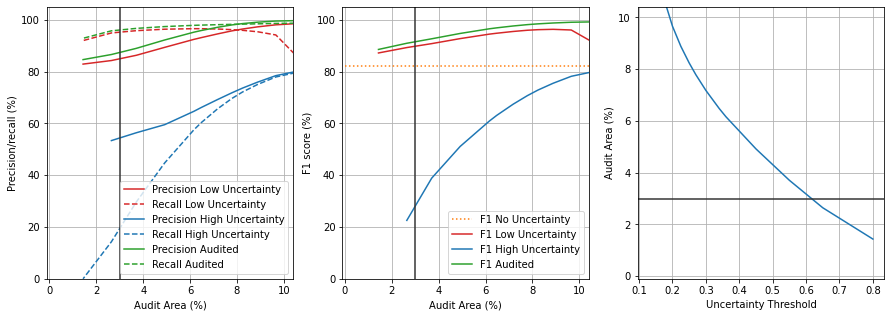

In [ ]:
trainer.plotUncertaintyAA()

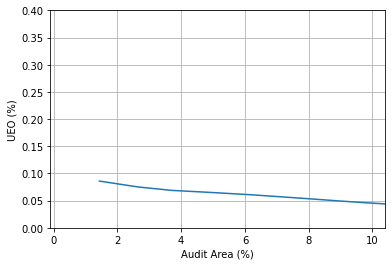

In [ ]:
trainer.plotUEO()

In [ ]:
trainer.getOptimalUncertaintyThreshold()

ic| bounds: (0.0015, 0.9985)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.38232011321635484
threshold 0.38232011321635484
(50909844,) (50909844,)


ic| label_current_deforestation_test_classified_incorrect.shape: (3151848,)
    predicted_test_classified_incorrect.shape: (3151848,)


cm_correct [[50394250    41429]
 [   16049   458116]]


ic| TP_H + FN_H + FP_H + TN_H: 3151848
    len(label_mask_current_deforestation_test): 54061692
ic| TP_H + FN_H + FP_H + TN_H: 3151848
    len(label_mask_current_deforestation_test): 54061692


cm_incorrect [[2812042   81698]
 [ 117571  140537]]
[0.91706653 0.96615313 0.62560821 0.05830095 0.63238014 0.54448913
 0.06209061]
0.6176798867836452
threshold 0.6176798867836452
(52458155,) (52458155,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1603537,)
    predicted_test_classified_incorrect.shape: (1603537,)
ic

cm_correct [[51754217   102196]
 [   28269   573473]]
cm_incorrect [[1452075   20931]
 [ 105351   25180]]


| TP_H + FN_H + FP_H + TN_H: 1603537
    len(label_mask_current_deforestation_test): 54061692
ic| TP_H + FN_H + FP_H + TN_H: 1603537
    len(label_mask_current_deforestation_test): 54061692


[0.84874843 0.95302139 0.78314099 0.02966124 0.5460736  0.19290437
 0.07282691]
0.7631402264327096
threshold 0.7631402264327096
(53141757,) (53141757,)


ic| label_current_deforestation_test_classified_incorrect.shape: (919935,)
    predicted_test_classified_incorrect.shape: (919935,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 919935
    len(label_mask_current_deforestation_test): 54061692
ic| TP_H + FN_H + FP_H + TN_H: 919935
    len(label_mask_current_deforestation_test): 54061692


cm_correct [[52377425   123127]
 [   42552   598653]]
cm_incorrect [[828867      0]
 [ 91068      0]]
[0.82941201 0.93363745 0.81752707 0.01701639        nan 0.
 0.08388617]
0.6099558840633504
threshold 0.6099558840633504
(52414837,) (52414837,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1646855,)
    predicted_test_classified_incorrect.shape: (1646855,)
ic

cm_correct [[51715068   100667]
 [   27738   571364]]
cm_incorrect [[1491224   22460]
 [ 105882   27289]]


| TP_H + FN_H + FP_H + TN_H: 1646855
    len(label_mask_current_deforestation_test): 54061692
ic| TP_H + FN_H + FP_H + TN_H: 1646855
    len(label_mask_current_deforestation_test): 54061692


[0.85020483 0.95370071 0.78026091 0.03046251 0.54853364 0.20491699
 0.07229476]
0.6257378232531509
threshold 0.6257378232531509
(52502767,) (52502767,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1558925,)
    predicted_test_classified_incorrect.shape: (1558925,)
ic

cm_correct [[51794523   103780]
 [   28835   575629]]
cm_incorrect [[1411769   19347]
 [ 104785   23024]]


| TP_H + FN_H + FP_H + TN_H: 1558925
    len(label_mask_current_deforestation_test): 54061692
ic| TP_H + FN_H + FP_H + TN_H: 1558925
    len(label_mask_current_deforestation_test): 54061692


[0.84724959 0.95229658 0.78608524 0.02883604 0.54339053 0.18014381
 0.07338402]
0.6148854372464695
threshold 0.6148854372464695
(52442433,) (52442433,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1619259,)
    predicted_test_classified_incorrect.shape: (1619259,)
ic

cm_correct [[51740027   101623]
 [   28063   572720]]
cm_incorrect [[1466265   21504]
 [ 105557   25933]]


| TP_H + FN_H + FP_H + TN_H: 1619259
    len(label_mask_current_deforestation_test): 54061692
ic| TP_H + FN_H + FP_H + TN_H: 1619259
    len(label_mask_current_deforestation_test): 54061692


[0.84930073 0.95328929 0.78211268 0.02995206 0.54668297 0.19722412
 0.07265008]
0.6141467300524623
threshold 0.6141467300524623
(52438393,) (52438393,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1623299,)
    predicted_test_classified_incorrect.shape: (1623299,)
ic

cm_correct [[51736363   101492]
 [   28015   572523]]
cm_incorrect [[1469929   21635]
 [ 105605   26130]]


| TP_H + FN_H + FP_H + TN_H: 1623299
    len(label_mask_current_deforestation_test): 54061692
ic| TP_H + FN_H + FP_H + TN_H: 1623299
    len(label_mask_current_deforestation_test): 54061692


[0.84942175 0.95335016 0.78184366 0.03002679 0.54705328 0.19835275
 0.07259218]
0.6138455184121394
threshold 0.6138455184121394
(52436696,) (52436696,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1624996,)
    predicted_test_classified_incorrect.shape: (1624996,)
ic

cm_correct [[51734826   101434]
 [   27992   572444]]
cm_incorrect [[1471466   21693]
 [ 105628   26209]]


| TP_H + FN_H + FP_H + TN_H: 1624996
    len(label_mask_current_deforestation_test): 54061692
ic| TP_H + FN_H + FP_H + TN_H: 1624996
    len(label_mask_current_deforestation_test): 54061692


[0.84947721 0.95338054 0.78173577 0.03005818 0.54713791 0.19879852
 0.07257148]
0.6144040107322538
threshold 0.6144040107322538
(52439785,) (52439785,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1621907,)
    predicted_test_classified_incorrect.shape: (1621907,)
ic

cm_correct [[51737624   101538]
 [   28032   572591]]
cm_incorrect [[1468668   21589]
 [ 105588   26062]]


| TP_H + FN_H + FP_H + TN_H: 1621907
    len(label_mask_current_deforestation_test): 54061692
ic| TP_H + FN_H + FP_H + TN_H: 1621907
    len(label_mask_current_deforestation_test): 54061692


[0.84937898 0.95332846 0.78193652 0.03000104 0.54693501 0.1979643
 0.07261129]
0.6144625336020283
threshold 0.6144625336020283
(52440104,) (52440104,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1621588,)
    predicted_test_classified_incorrect.shape: (1621588,)
ic

cm_correct [[51737916   101547]
 [   28037   572604]]
cm_incorrect [[1468376   21580]
 [ 105583   26049]]


| TP_H + FN_H + FP_H + TN_H: 1621588
    len(label_mask_current_deforestation_test): 54061692
ic| TP_H + FN_H + FP_H + TN_H: 1621588
    len(label_mask_current_deforestation_test): 54061692


[0.84937054 0.95332153 0.78195427 0.02999514 0.54691469 0.19789261
 0.07261594]
0.6143706682858363
threshold 0.6143706682858363
(52439616,) (52439616,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1622076,)
    predicted_test_classified_incorrect.shape: (1622076,)
ic

cm_correct [[51737470   101534]
 [   28030   572582]]
cm_incorrect [[1468822   21593]
 [ 105590   26071]]


| TP_H + FN_H + FP_H + TN_H: 1622076
    len(label_mask_current_deforestation_test): 54061692
ic| TP_H + FN_H + FP_H + TN_H: 1622076
    len(label_mask_current_deforestation_test): 54061692
ic| self.threshold_optimal: 0.6144040107322538


[0.84938201 0.95333094 0.78192423 0.03000417 0.54697466 0.19801612
 0.07260796]


In [ ]:
snapshot = tracemalloc.take_snapshot()
display_top(snapshot)

In [ ]:
trainer.getUncertaintyMetricsFromOptimalThreshold()

threshold 0.6144040107322538
(52439785,) (52439785,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1621907,)
    predicted_test_classified_incorrect.shape: (1621907,)
ic

cm_correct [[51737624   101538]
 [   28032   572591]]
cm_incorrect [[1468668   21589]
 [ 105588   26062]]


| TP_H + FN_H + FP_H + TN_H: 1621907
    len(label_mask_current_deforestation_test): 54061692
ic| TP_H + FN_H + FP_H + TN_H: 1621907
    len(label_mask_current_deforestation_test): 54061692


[0.84937898 0.95332846 0.78193652 0.03000104 0.54693501 0.1979643
 0.07261129]
threshold 0.6144040107322538
(54061692,) (54061692,)


ic| self.m_optimal: {'AA': array([0.03000104]),
                     'UEO': array([0.07261129]),
                     'f1': 82.34,
                     'f1_H': array([0.29070669]),
                     'f1_L': array([0.8983567]),
                     'precision_H': array([0.54693501]),
                     'precision_L': array([0.84937898]),
                     'recall_H': array([0.1979643]),
                     'recall_L': array([0.95332846]),
                     'recall_Ltotal': array([0.78193652])}
ic| self.m_audited_optimal: {'f1': array([0.91575707]),
                             'precision': array([0.87398778]),
                             'recall': array([0.96171919])}


cm_audited [[53227881   101538]
 [   28032   704241]]
[0.87398778 0.96171919]


{'metrics': {'precision_L': array([0.84937898]),
  'recall_L': array([0.95332846]),
  'recall_Ltotal': array([0.78193652]),
  'AA': array([0.03000104]),
  'precision_H': array([0.54693501]),
  'recall_H': array([0.1979643]),
  'UEO': array([0.07261129]),
  'f1_L': array([0.8983567]),
  'f1_H': array([0.29070669]),
  'f1': 82.34},
 'metrics_audited': {'precision': array([0.87398778]),
  'recall': array([0.96171919]),
  'f1': array([0.91575707])},
 'exp': 193}